The exercise in this notebook was taken from the book [Computational and Inferential Thinking](https://www.inferentialthinking.com/chapters/intro.html) The Foundations of Data Science 
By Ani Adhikari and John DeNero

Licensed for free consumption under the following license:
Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International ([CC BY-NC-ND 4.0](https://creativecommons.org/licenses/by-nc-nd/4.0/)).

Quotations refer to the original text.

# Statistics on employee compensation in the City of San Francisco in 2015


In this notebook, we explore the employee compensations in the City of San Francisco in 2015 using various statics, such as mean, standard, median and other percentiles.

The mentioned dataset contains all employees of the City. However, most often, we don't have access to an entire population but only to a sample of it. Data scientists are interested in making estimates about the population from a sample. However, because the statistic depends on the random sample, a question that arises is how much does the static depend on the particular sample; how different will it be if we had drawn a different sample?

To answer this question, in the second part of this notebook, we learn about a technique called **bootstrapping** used to quantify the error or confidence of an estimate.

## The dataset

> [SF OpenData](https://data.sfgov.org/) is a website where the City and County of San Francisco make some of their data publicly available. One of the data sets contains [compensation data for employees of the City](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd). These include medical professionals at City-run hospitals, police officers, fire fighters, transportation workers, elected officials, and all other employees of the City.

We're going to start by importing some modules for loading, plotting and manipulating the data.

In [2]:
import numpy as np  # module for creating and manipulating arrays
import matplotlib.pyplot as plt  # plotting
import pandas as pd  # dataframes

We load a pre-cleaned version of the dataset from [Berkeley's Data 8 course](https://github.com/data-8) material

In [3]:
url = 'https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/san_francisco_2015.csv'
df0 = pd.read_csv(url)

Print dataset size and column names

In [4]:
print("Employee compensations in the City of San Francisco in the "\
      "year 2015\nShape: {} \nColumns: {}".format(df0.shape, df0.columns))

df0.head()

Employee compensations in the City of San Francisco in the year 2015
Shape: (42989, 22) 
Columns: Index(['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')


,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",...,21538,82146.04,0.00,0.00,82146.04,16942.21,12340.88,6337.73,35620.82,117766.86
1,Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12.0,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,...,5459,32165.75,973.19,848.96,33987.90,0.00,4587.51,2634.42,7221.93,41209.83
2,Calendar,2015,4,Community Health,DPH,Public Health,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",...,41541,71311.00,5757.98,0.00,77068.98,14697.59,12424.50,6370.06,33492.15,110561.13
3,Calendar,2015,4,Community Health,DPH,Public Health,351.0,Municipal Executive Association - Miscellaneous,0900,Management,...,26718,28430.25,0.00,763.07,29193.32,0.00,4223.14,5208.51,9431.65,38624.97
4,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790.0,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,45810,7948.75,0.00,0.00,7948.75,0.00,2873.17,616.24,3489.41,11438.16


We have one row for each of the 42989 employees and 22 columns. A full description of the dataset can be found [here](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd). 
In this notebook we're interested in the Total compensation, which is the employee's salary plus the state contributions such as retirement and benefit plans ([Employee Compensation | DataSF](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd)). 

### Top three highest compensations

Let's have a look at the rows with top 3 highest 'Total Compensation'. 

Hint: sort the rows using the method `sort_values()` and slicing the dataframe to print the top three rows `[:3]`

In [5]:
df0.sort_values(['Total Compensation'], ascending=False)[:3]

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
19177,Calendar,2015,6,General Administration & Finance,RET,Retirement System,351.0,Municipal Executive Association - Miscellaneous,1100,Administrative & Mgmt (Unrep),...,46881,507831.60,0.00,0.00,507831.60,105052.98,12424.5,23566.16,141043.64,648875.24
13194,Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164.0,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,...,1016,279311.10,3829.36,114433.58,397574.04,56211.64,12424.5,14299.10,82935.24,480509.28
499,Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,164.0,Physicians and Dentists - Miscellaneous,2500,Med Therapy & Auxiliary,...,13746,279311.03,9046.92,56742.56,345100.51,56211.61,12424.5,13482.66,82118.77,427219.28


### Three lowest compensations

Now, let's have a look at the other end of the distribution.  The rows with the top 3 lowest 'Total Compensation'. 

Hint: same as above but changing the keyword parameter `ascending` to `False`

In [6]:
# your code here
df0.sort_values(by="Total Compensation", ascending=True)[:3]

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
27308,Calendar,2015,1,Public Protection,FIR,Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,...,43833,0.0,0.0,0.0,0.0,0.0,0.00,-423.76,-423.76,-423.76
15746,Calendar,2015,4,Community Health,DPH,Public Health,790.0,"SEIU - Miscellaneous, Local 1021",9900,Public Service Aide,...,27871,-292.4,0.0,0.0,-292.4,0.0,-95.58,-22.63,-118.21,-410.61
24576,Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790.0,"SEIU - Miscellaneous, Local 1021",8300,Correction & Detention,...,10517,0.0,0.0,0.0,0.0,0.0,0.00,-159.12,-159.12,-159.12


Negative salaries can occur due to compensation adjustments. For example an employee that was mistakenly overpaid the previous year ([Employee Compensation FAQ](https://support.datasf.org/help/employee-compensation-faq)).


### Keep rows with salaries equivalent to a half-time job at a minimum wage

> For clarity of comparison, we will focus our attention on those who had at least the equivalent of a half-time job for the whole year. At a minimum wage of about $\$ 10$ per hour, and $20$ hours per week for 52 weeks, that's a salary of about $\$10,000$.

In [7]:
df = df0.loc[df0['Salaries'] > 10000]

### Part 1: Statistics on the Total Compensation

Let's read the column 'Total Compensation into an array (`TC`) and scale it to have units on thousand dollars.

In [8]:
TC_k = df['Total Compensation'] / 1000  # scale the Total compensation 

#### Mean and Standard Deviation

The **mean**, often abbreviated with the Greek letter $\mu$, is a measurement of the centrality of a collection.
It's defined as the sum of the elements, divided by the number of elements, 
$$
\mu = \sum \limits_{i=1}^{N} \frac{x_i}{N}.
$$

The **standard deviation**, often abbreviated as SD or with the Greek letter $\sigma$, tells us how close are the points of the collection to the mean. It's defines as the root mean square of the deviations from the mean,
$$
\sigma = \sqrt{\sum \limits_{i=1}^{N} \frac{(x_i - \mu)^2}{N}}.
$$

Because the mean tells us about the center of the collection and the standard deviation about its spread, means are often reported using the SD as uncertainties.

Calculate the mean 'Total Compensation' and report it using one standard deviation as uncertainties. Calculate also the range of the distribution, i.e. the minimum and minimum and maximum of the total compensation.


In [9]:
# you can use NumPy to compute the statistics
TC_mean =  np.mean(TC_k)
TC_std =  np.std(TC_k)
TC_min =  np.min(TC_k)
TC_max =  np.max(TC_k)

# Report the mean 'Total Compensation' using the standard deviation and uncertainties
print("The mean Total Compensation is {:.0f} +- {:.0f} (mean +- SD) "\
      "thousand dollars annually, \nwith a range "\
      "({:.2f}, {:.2f})".format(TC_mean, TC_std, TC_min, TC_max))


The mean Total Compensation is 115 +- 61 (mean +- SD) thousand dollars annually, 
with a range (11.05, 648.88)


Reporting the mean with such uncertainties makes sense of symmetric distributions. 
However, from the range of the distribution, we can tell that the 'Total Compensation' is not symmetrically distributed. So let's have a look at the distribution!


#### Distribution of total compensation

Plot an histogram of the 'Total Compensation' in the range 0 to 700 K dollars.

Hint: use `plt.hist()`

Text(0.5, 0, 'Total Compensation (k$)')

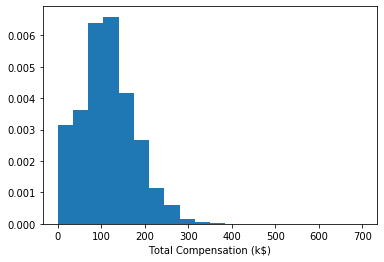

In [11]:
plt.hist(TC_k, range=(0, 700), bins=20, density=True)
plt.xlabel("Total Compensation (k$)")

As expected, the distribution is not symmetric, but right-skewed due to the few high-income points. 

One thing to ask know is what is the middle point of the distribution - the point that divides the distribution into two halves with the same number of items each, and this is what the median tells us.


#### Median


In [12]:
TC_median = np.median(TC_k)
print("The median is {:.1f} thousand dollars annually".format(TC_median))

The median is 110.3 thousand dollars annually


#### Percentiles

In addition to the midpoint of the distribution one can split the distribution into any fraction and this is what the percentiles measure.

What are the 10, 50 and 90 percentiles?

In [14]:
print("10, 50 and 90 percentiles {}".format( np.percentile(TC_k, [10, 50, 90])))

10, 50 and 90 percentiles [ 32.756136 110.30579  196.293506]


Notice that the 50 percentile is he same as to the median, as is natural from the definition of the median.

#### How would you describe the employee compensation in the City of San Francisco?

Describe with words referring to the distribution ans the statistics from above.

## Part 2: Estimating the Median from a Random Sample

Normally we don't have access to the entire population and we want to make estimates, for example, the median, about it from a random sample. 
In this part, we simulate this situation by drawing a random sample of 500 points from the population, calculating the median as an estimate of the population median (parameter). Then we use Bootstrapping to calculate the confidence of the estimate. 

#### Random sample

Draw a random sample form the population `TC`.

Hint: use `np.random.choice()` with and set the keyword argument replace to `False`

Sample median 109.19


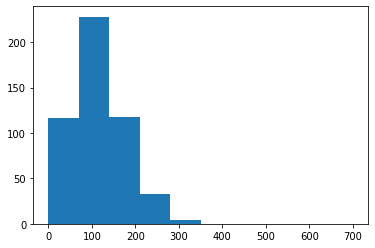

In [15]:
# draw sample with 500 elements
n = 500
our_sample = np.random.choice(TC_k, size=n, replace=False)

# plot an histogram
plt.hist(our_sample, range=(0,700))

# Calcualte the median of the sample
sample_median = np.median(our_sample)
print("Sample median {:.2f}".format(sample_median))

> To see how different the estimate would be if the sample had come out differently, we could just draw another sample from the population, but that would be cheating. We are trying to mimic real life, in which we won't have all the population data at hand.

> Somehow, we have to get another random sample without sampling from the population.



### The Bootstrap: Resampling from the Sample

WARNING: the following paragraph is quite loaded with jargon and may sound like a tongue twister.

The idea behind bootstrapping is to simulate possible samples by randomly sampling our sample. 
For each of this samples we compute the statistic, in our case the median, thus obtaining a distribution of bootstrap sample medians. The 95% confidence interval is given by the 2.5 and 97.5% of this distribution.

 
Read more about the Bootstrap method [here](https://www.inferentialthinking.com/chapters/13/2/Bootstrap.html).

#### Resample

The because we're drawing a sample from the original sample we want to draw the elements mantaining the probabilities of the original sample, thus we sample with replacement.


(array([ 69.,  51.,  88., 111.,  69.,  47.,  31.,  14.,  11.,   9.]),
 array([ 15.19292 ,  43.107871,  71.022822,  98.937773, 126.852724,
        154.767675, 182.682626, 210.597577, 238.512528, 266.427479,
        294.34243 ]),
 <a list of 10 Patch objects>)

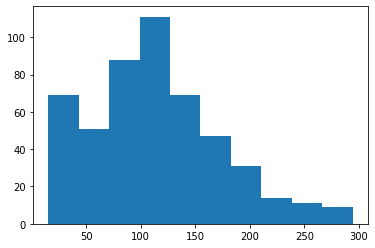

In [20]:
# draw a sample with replacement from the original sample our_sample
resample_1 = np.random.choice(our_sample, n, replace=True)
# plot histogram of the drawed sample
plt.hist(resample_1)

#### Bootstrap Empirical Distribution of the Sample Median 

> Let us define a function bootstrap_median that takes our original sample, the label of the column containing the variable, and the number of bootstrap samples we want to take, and returns an array of the corresponding resampled medians.

> Each time we resample and find the median, we replicate the bootstrap process. So the number of bootstrap samples will be called the number of replications.

In [21]:
def bootstrap_median(original_sample, replications):
    """Returns an array of bootstrapped sample medians
    Parameters
    ----------
    original_sample: array containing the original sample
    replications: number of bootstrap samples
    """
    n = len(original_sample)
    medians = np.zeros(replications)
    for i in np.arange(replications):
        bootstrap_sample = np.random.choice(original_sample, n, replace=True)
        resampled_median = np.median(bootstrap_sample)
        medians[i] = resampled_median
        
    return medians

Let's use the function `bootstrap_median` to get the distribution of medians with 5000 replications.

In [22]:
bstrap_medians = bootstrap_median(our_sample, 5000)

Now let's plot the histogram of the 5000 bootstrap medians together with the sample median (`sample_median`) that we calculated with the original sample and the middle 95% interval.

The sample median 109.2
95% confidence interval of the median (103.9, 114.1)


Text(0.5, 0, 'Bootstrapped medians')

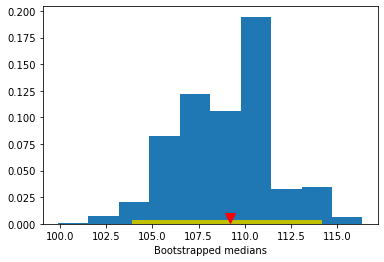

In [48]:
# calculate the right percentile 2.5 and left percentile 97.5 of bstrap_medians 
leftp, rightp = np.percentile(bstrap_medians, [2.5, 97.5])
print("The sample median {:.1f}\n95% confidence interval of the median ({:.1f}, {:.1f})".format(sample_median, leftp, rightp))

# plot histogram of the bstrap_medians with the 95% confidence intervals and the sample median
plt.hist(bstrap_medians, density=True)
# indicate the middle 95% with an horizontal line
plt.hlines(0.0, leftp, rightp, 'y', lw=8)  # 2.5 and 97.5 percentiles
# indicate the sample median with a red dot
plt.plot(sample_median, 0.0053, 'v-r', ms=10)  # median
plt.xlabel('Bootstrapped medians')

> To summarize what the simulation shows, suppose you are estimating the population median by the following process:
> * Draw a large random sample from the population.
> * Bootstrap your random sample and get an estimate from the new random sample.
> * Repeat the above step thousands of times, and get thousands of estimates.
> * Pick off the "middle 95%" interval of all the estimates.

> That gives you one interval of estimates. Now if you repeat the entire process 100 times, ending up with 100 intervals, then about 95 of those 100 intervals will contain the population parameter.
> In other words, this process of estimation captures the parameter about 95% of the time.
> You can replace 95% by a different value, as long as it's not 100. Suppose you replace 95% by 80% and keep the sample size fixed at 500. Then your intervals of estimates will be shorter than those we simulated here, because the "middle 80%" is a smaller range than the "middle 95%". Only about 80% of your intervals will contain the parameter.

# EXTRA
## Repeating Bootstrap-Replications for Confidence on Population-Parameter

In [128]:
# Repeat bootstrap-process and save 2.5/97.5-percentiles
repetitions = 100
l_ends = np.zeros(repetitions)
r_ends = np.zeros(repetitions)
for i in range(repetitions):
    sample = np.random.choice(TC_k, size=500, replace=False)
    bstrap_medians = bootstrap_median(sample, replications=500)
    l_ends[i], r_ends[i] = np.percentile(bstrap_medians, [2.5, 97.5])

Text(0.5, 1.0, 'Distribution of the Median for Income \nwith 95% Confidence Interval\n for 100 Samples')

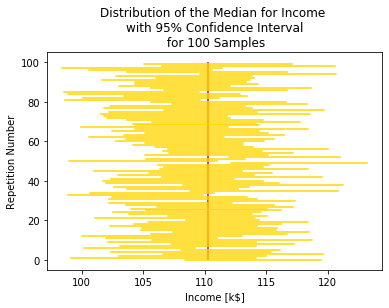

In [129]:
# Plot 100 95%-Confidence-Intervals
for i in range(repetitions):
    interval = np.arange(l_ends[i], r_ends[i])
    plt.plot(interval, np.full(shape=len(interval), fill_value=i), color="gold")

plt.vlines(TC_median, 0, 100, color="red")
plt.xlabel("Income [k$]")
plt.ylabel("Repetition Number")
plt.title("Distribution of the Median for Income \nwith 95% Confidence Interval\n for 100 Samples")

In [130]:
table = np.zeros(repetitions)
for i in range(repetitions):
    table[i] = l_ends[i] <= TC_median <= r_ends[i]

In [132]:
sum(table) / len(table)

0.93